In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import joblib

In [1]:
# prompt: kết nối drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Đọc dữ liệu
df = pd.read_csv("/content/drive/MyDrive/final_data_sensor_labeled.csv")

# Chuẩn hóa dữ liệu cho từng cây (dựa trên id)
features = ['humidity', 'light', 'rain', 'soil_moisture', 'temperature']
label_col = 'growth_label'

In [5]:
print(df.info())
print(df.isnull().sum())
print(df[label_col].unique())
print(df.describe())
print(df.head())
print(df[label_col].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             300000 non-null  int64  
 1   humidity       300000 non-null  float64
 2   light          300000 non-null  float64
 3   rain           300000 non-null  float64
 4   soil_moisture  300000 non-null  float64
 5   temperature    300000 non-null  float64
 6   timestamp      300000 non-null  object 
 7   growth_label   300000 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 18.3+ MB
None
id               0
humidity         0
light            0
rain             0
soil_moisture    0
temperature      0
timestamp        0
growth_label     0
dtype: int64
['trung bình' 'kém' 'tốt']
                 id       humidity          light           rain  \
count  300000.00000  300000.000000  300000.000000  300000.000000   
mean     2500.50000      34.563055   32772.3

In [6]:
X = df.drop(['id', 'timestamp', 'growth_label'], axis=1)

le = LabelEncoder()
y = le.fit_transform(df['growth_label'])  # "kém" -> 0, "trung bình" -> 1, "tốt" -> 2

In [7]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [8]:
np.unique(y_resampled, return_counts=True)

(array([0, 1, 2]), array([219652, 219652, 219652]))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [10]:
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [11]:
y_pred = grid_search.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.9845362389219376
Classification Report:
               precision    recall  f1-score   support

         kém       0.97      0.99      0.98     43660
  trung bình       0.99      0.97      0.98     44266
         tốt       0.99      1.00      1.00     43866

    accuracy                           0.98    131792
   macro avg       0.98      0.98      0.98    131792
weighted avg       0.98      0.98      0.98    131792



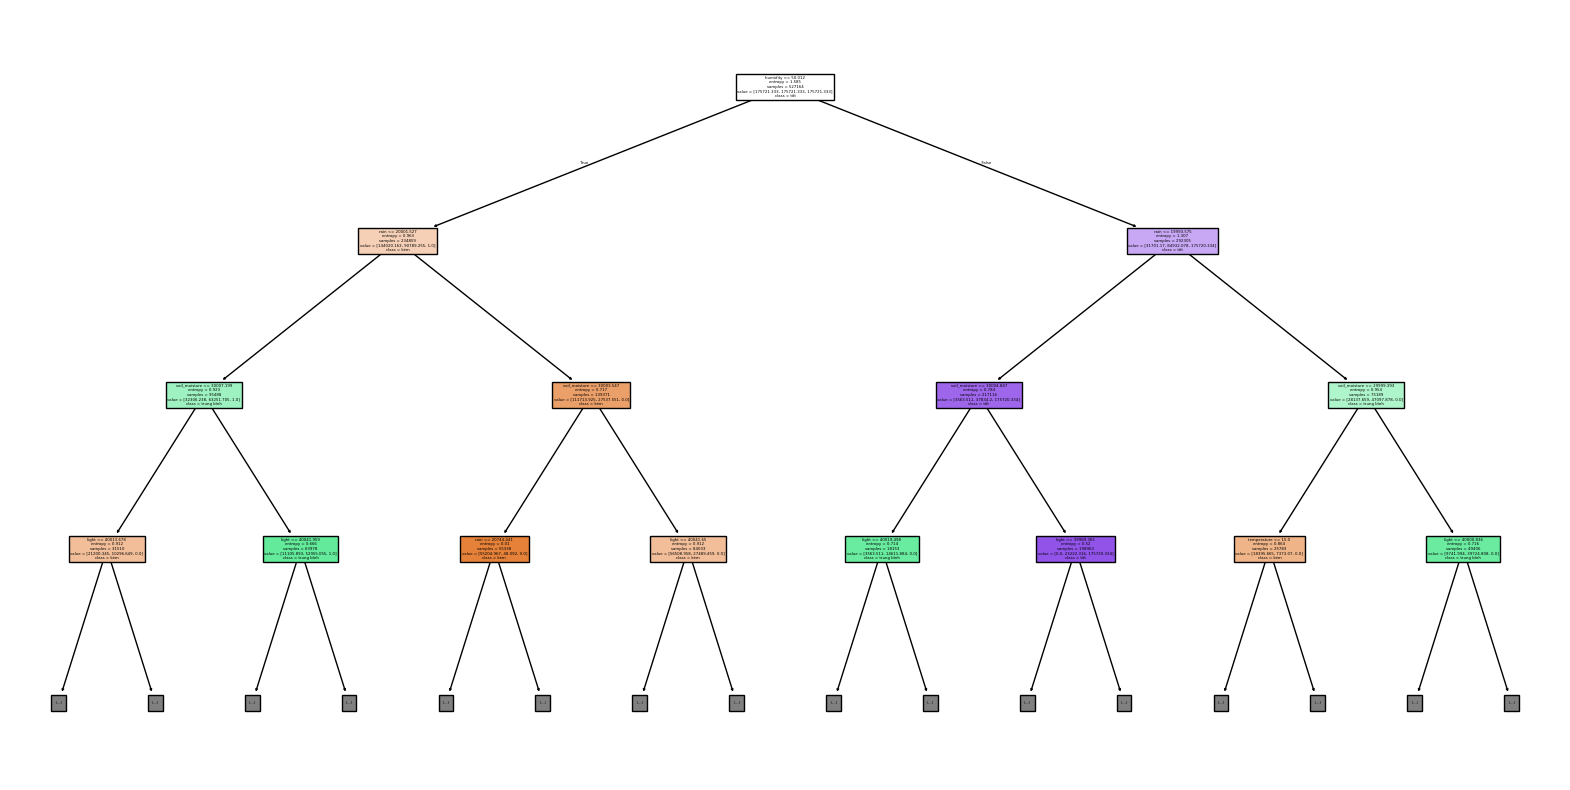

In [16]:
plt.figure(figsize=(20, 10))
plot_tree(grid_search.best_estimator_, feature_names=X.columns, class_names=le.classes_, filled=True, max_depth=3)
plt.show()

In [17]:
joblib.dump(grid_search, 'model.h5')

['model.h5']